In [1]:
import numpy as np

### Helper Functions

In [2]:
def dist(p1, p2):
    return ( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )**0.5

def get_line_from_two_points(p1, p2):
    x1 = p1[0]
    x2 = p2[0]
    y1 = p1[1]
    y2 = p2[1]
    a = y2 - y1
    b = -1*(x2 - x1)
    c = -1 * (a * x1  +  b * y1)
    line = [a, b, c]
    return line

def is_point_on_segment(check_p, p1, p2):
    small_x = p1[0]
    big_x = p2[0]
    small_y = p1[1]
    big_y = p2[1]
    if small_x > big_x:
        temp = small_x
        small_x = big_x
        big_x = temp
    if small_y > big_y:
        temp = small_y
        small_y = big_y
        big_y = temp
    if check_p[0] >= small_x and check_p[0] <= big_x and check_p[1] >= small_y and check_p[1] <= big_y:
        return True
    return False
    
def find_circle_seg_intersection(circle, p1, p2):
    line = get_line_from_two_points(p1, p2)
    center_x = circle[0]
    center_y = circle[1]
    radius = circle[2]
    a = line[0]
    b = line[1]
    c = line[2]
    x = None
    y = None
    if b != 0:
        m = -1 * (a / b)
        c_cap = -1 * (c / b)
        A = m**2 + 1
        B = 2 * (m * c_cap - m * center_y - center_x)
        C = center_y**2 - radius**2 + center_x**2 - (2 * c_cap * center_y) + c_cap**2
        discriminant = B**2 - 4*A*C
        x = (-1*B + discriminant**0.5) / (2*A)
        y = m * x + c_cap
        if is_point_on_segment([x, y], p1, p2) == False:
            x = (-1*B - discriminant**0.5) / (2*A)
            y = m * x + c_cap
    if b == 0:
        x = -1*c / a
        B = -2 * center_y
        C = center_x**2 + center_y**2 - radius**2 - 2*x*center_x + x**2
        discriminant = B**2 - 4*C
        y = (-B + discriminant**0.5) / 2
        if is_point_on_segment([x, y], p1, p2) == False:
            y = (-B - discriminant**0.5) / 2
    return [x, y]

### Part a

In [5]:
def calc_attractive_potential_helper(x, y, c, d_star, q_goal):
    d = dist([x, y], q_goal)
    potential = None
    if d <= d_star:
        potential = 0.5 * c * (d**2)
    if d > d_star:
        potential = d_star * c * d  -  0.5 * c * (d_star**2)
    return potential

def calc_attractive_potential(x_range, y_range, c, d_star, q_goal):
    step = 0.1
    res = []
    for x in np.arange(x_range[0], x_range[1] + step, step):
        for y in np.arange(y_range[0], y_range[1] + step, step):
            potential = calc_attractive_potential_helper(x, y, c, d_star, q_goal)
            res.append([x, y, potential])
    return np.array(res)  

def calc_repulsive_potential_helper(x, y, n, q_star, circle):
    clamp = 6
    clamp2 = 6
    potential = np.NaN
    p_dist = dist([x, y], [circle[0], circle[1]])
    if p_dist <= circle[2]:
        potential = clamp
        return potential
    d = dist([x, y], [circle[0], circle[1]])
    if d <= q_star + circle[2]:
        di = d - circle[2]
        potential = 0.5 * n * (1/di - 1/q_star)**2
#         print(di, potential)
    if d > q_star + circle[2]:
        potential = 0
    return potential if potential < clamp2 else clamp2

def calc_repulsive_potential(x_range, y_range, n, q_star, circle):
    step = 0.1
    res = []
    for x in np.arange(x_range[0], x_range[1] + step, step):
        for y in np.arange(y_range[0], y_range[1] + step, step):
            potential = calc_repulsive_potential_helper(x, y, n, q_star, circle)
            res.append([x, y, potential])
    return np.array(res)

def shapify(pot):
    X = []
    Y = []
    Z = []
    for i in range(pot.shape[0]):
        X.append(pot[i][0])
        Y.append(pot[i][1])
        Z.append(pot[i][2])
    return (np.array(X), np.array(Y), np.array(Z))

def calc_combined_potential(x_range, y_range, c, d_star, q_goal, n, q_star, circle):
    attractive_pot = np.array(calc_attractive_potential(x_range, y_range, c, d_star, q_goal))
    repulsive_pot = np.array(calc_repulsive_potential(x_range, y_range, n, q_star, circle))
    X = []
    Y = []
    Z = []
    for i in range(attractive_pot.shape[0]):
        X.append(attractive_pot[i][0])
        Y.append(attractive_pot[i][1])
        Z.append(attractive_pot[i][2] + repulsive_pot[i][2])
    return (np.array(X), np.array(Y), np.array(Z))

In [6]:
x_range = [-5, 5]
y_range = [-5, 5]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
attractive_pot = np.array(calc_attractive_potential(x_range, y_range, c, d_star, q_goal))
repuslive_pot = np.array(calc_repulsive_potential(x_range, y_range, n, q_star, circle))
combined_pot = calc_combined_potential(x_range, y_range, c, d_star, q_goal, n, q_star, circle)

### Part A Answer

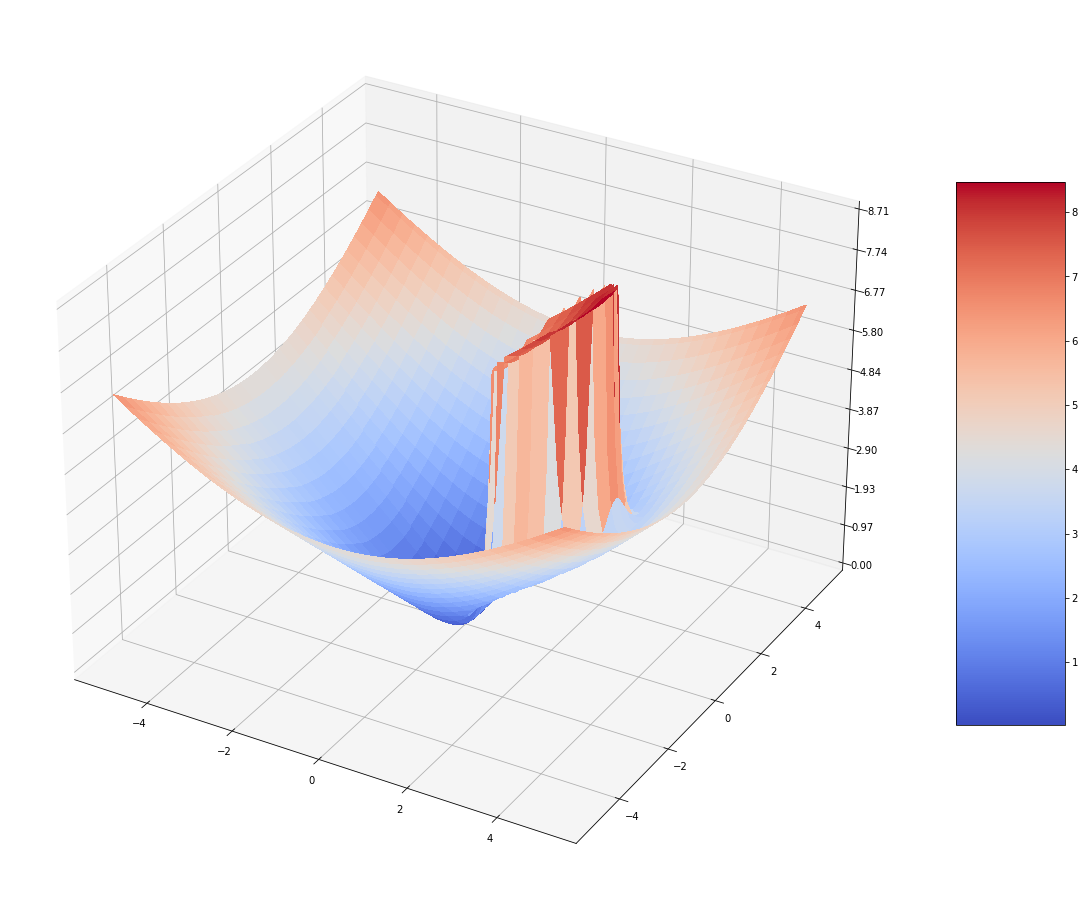

In [7]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

# Make data.
X = combined_pot[0]
Y = combined_pot[1]
Z = combined_pot[2]
X = X.reshape((101, 101)).transpose()
Y = Y.reshape((101, 101)).transpose()
Z = Z.reshape((101, 101)).transpose()

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig('potential.png')

plt.show()

# Part B

In [8]:
def calc_gradient_attractive_potential(q, c, d_star, q_goal):
    x = q[0]
    y = q[1]
    d = dist([x, y], q_goal)
    du_dx = None
    du_dy = None
    if d <= d_star:
        du_dx = c * (x - q_goal[0])
        du_dy = c * (y - q_goal[1])
    if d > d_star:
        du_dx = d_star * c * (x - q_goal[0]) / d
        du_dy = d_star * c * (y - q_goal[1]) / d
    return [du_dx, du_dy]

def calc_gradient_repulsive_potential(q, n, q_star, circle):
    clamp_force = 0
    du_dx = np.NaN
    du_dy = np.NaN
    force = np.array([du_dx, du_dy])
    d = dist(q, circle[0:2])
    if d <= circle[2]:
        force = [clamp_force, clamp_force]
        return force
    if d <= circle[2] + q_star:
        di = d - circle[2]
        closest_point = find_circle_seg_intersection(circle, q, circle[0:2])
        common = n * (1/q_star - 1/di) / di**2
        delta_dx = (q[0] - closest_point[0])/di
        du_dx = common * delta_dx 
        delta_dy = (q[1] - closest_point[1])/di
        du_dy = n * common * delta_dy
    if d > circle[2] + q_star:
        du_dx = 0
        du_dy = 0
    force = [du_dx, du_dy]
    return force

def calc_gradient_combined_potential(q, c, d_star, q_goal, n, q_star, circle):
    attractive_force = calc_gradient_attractive_potential(q, c, d_star, q_goal)
    repulsive_force = calc_gradient_repulsive_potential(q, n, q_star, circle)
    return [ attractive_force[0] + repulsive_force[0], attractive_force[1] + repulsive_force[1] ]
    
def gradient_descent(q_start, alpha, epsilon, c, d_star, q_goal, n, q_star, circle):
    i = 0
    q = [q_start]
    while dist(calc_gradient_combined_potential(q[i], c, d_star, q_goal, n, q_star, circle), [0, 0]) > epsilon:
        q.append([q[i][0] - alpha * calc_gradient_combined_potential(q[i], c, d_star, q_goal, n, q_star, circle)[0],\
                 q[i][1] - alpha * calc_gradient_combined_potential(q[i], c, d_star, q_goal, n, q_star, circle)[1]])
        i += 1
    return q

### Part B Answer
gradient = [4.5, 0.0] <br>
potential = 0.625

In [9]:
q = [0.5, 0]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
calc_gradient_combined_potential(q, c, d_star, q_goal, n, q_star, circle)

[4.5, 0.0]

In [10]:
q = [0.5, 0]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
print(calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle), calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal))

0.5 0.125


# Part 3

In [117]:
def find_critical_point(q_start):
    c = 1
    d_star = 1
    q_goal = [0, 0]
    n = 1
    q_star = 1
    circle = [2, 0, 1]
    alpha = 0.1
    epsilon = 0.001
    return gradient_descent(q_start, alpha, epsilon, c, d_star, q_goal, n, q_star, circle)

In [124]:
q_start = [3.6, 0.0]
find_critical_point(q_start)

[[3.6, 0.0],
 [3.685185185185185, 0.0],
 [3.683051056900582, 0.0],
 [3.6825067858636293, 0.0],
 [3.6823718364292546, 0.0]]

### Part 3 Answer
Iteration q values
[[3.5, 0],
 [3.8, 0.0],
 [3.7390624999999997, 0.0],
 [3.703701257076774, 0.0],
 [3.688729817912532, 0.0],
 [3.684007429651679, 0.0],
 [3.6827477233042796, 0.0],
 [3.682431381086364, 0.0]]
 <br>
 <b>It's a minima because</b><br>
pot_back_y > pot_x_y<br>
 pot_front_y > pot_x_y<br>
 pot_front_x > pot_x_y<br>
 pot_back_x > pot_x_y<br>

In [81]:
q = [3.6827477233042796, 0.0]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
pot_back_x = calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle) + calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal)

In [54]:
q = [3.682431381086364, 0.0]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
pot_x_y = calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle) + calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal)

In [72]:
q = [3.682659222537276, 0.0]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
pot_front_x = calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle) + calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal)

In [138]:
q = [3.6827477233042796, -0.00001]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
pot_back_y = calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle) + calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal)

In [139]:
q = [3.6827477233042796, 0.00001]
c = 1
d_star = 1
q_goal = [0, 0]
n = 1
q_star = 1
circle = [2, 0, 1]
pot_front_y = calc_repulsive_potential_helper(q[0], q[1], n, q_star, circle) + calc_attractive_potential_helper(q[0], q[1], c, d_star, q_goal)

In [140]:
pot_back_y > pot_x_y

True

In [141]:
pot_front_y > pot_x_y

True

In [142]:
pot_front_x > pot_x_y

True

In [143]:
pot_back_x > pot_x_y

True